In [1]:
'''Objective: To combine the ML input arrays atomic position and lattice data into a single array 
                by use of radial pair distribution function'''

'''Specifically, this model calculates the PDF for Solid Gold, an FCC structure'''

'Specifically, this model calculates the PDF for Solid Gold, an FCC structure'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial 

In [19]:
L= 4.07

X1 = L*np.eye(3)
print(X1)


[[4.07 0.   0.  ]
 [0.   4.07 0.  ]
 [0.   0.   4.07]]


In [22]:
 X2= np.array([[0,0,0],[0,.5,.5], [.5,.5,0], [.5,0,.5]]) 

coor = []
N=1
for i in range(-N,N+1):
    for j in range(-N,N+1):
        for k in range(-N,N+1):
            for x2 in X2:
                coor.append(x2+[i,j,k])
#print(coor)
print(len(range(-N,N+1)))
print(len(coor),4*(2*N+1)**3)
supercell=np.asarray(coor).reshape(4*(2*N+1)**3,3)
#print(supercell)
supercell.shape

3
108 108


(108, 3)

In [23]:

rij_dot = np.dot(supercell, X1)
print(rij_dot)

[[-4.07  -4.07  -4.07 ]
 [-4.07  -2.035 -2.035]
 [-2.035 -2.035 -4.07 ]
 [-2.035 -4.07  -2.035]
 [-4.07  -4.07   0.   ]
 [-4.07  -2.035  2.035]
 [-2.035 -2.035  0.   ]
 [-2.035 -4.07   2.035]
 [-4.07  -4.07   4.07 ]
 [-4.07  -2.035  6.105]
 [-2.035 -2.035  4.07 ]
 [-2.035 -4.07   6.105]
 [-4.07   0.    -4.07 ]
 [-4.07   2.035 -2.035]
 [-2.035  2.035 -4.07 ]
 [-2.035  0.    -2.035]
 [-4.07   0.     0.   ]
 [-4.07   2.035  2.035]
 [-2.035  2.035  0.   ]
 [-2.035  0.     2.035]
 [-4.07   0.     4.07 ]
 [-4.07   2.035  6.105]
 [-2.035  2.035  4.07 ]
 [-2.035  0.     6.105]
 [-4.07   4.07  -4.07 ]
 [-4.07   6.105 -2.035]
 [-2.035  6.105 -4.07 ]
 [-2.035  4.07  -2.035]
 [-4.07   4.07   0.   ]
 [-4.07   6.105  2.035]
 [-2.035  6.105  0.   ]
 [-2.035  4.07   2.035]
 [-4.07   4.07   4.07 ]
 [-4.07   6.105  6.105]
 [-2.035  6.105  4.07 ]
 [-2.035  4.07   6.105]
 [ 0.    -4.07  -4.07 ]
 [ 0.    -2.035 -2.035]
 [ 2.035 -2.035 -4.07 ]
 [ 2.035 -4.07  -2.035]
 [ 0.    -4.07   0.   ]
 [ 0.    -2.035 

In [24]:
origin = np.zeros([1,3])
#print(origin) 

In [25]:
rij_dist= spatial.distance.cdist(rij_dot, origin)

rij_dist.shape

print(rij_dist)
rij_dist.shape

[[7.04944679]
 [4.98471163]
 [4.98471163]
 [4.98471163]
 [5.7558492 ]
 [4.98471163]
 [2.8779246 ]
 [4.98471163]
 [7.04944679]
 [7.61427278]
 [4.98471163]
 [7.61427278]
 [5.7558492 ]
 [4.98471163]
 [4.98471163]
 [2.8779246 ]
 [4.07      ]
 [4.98471163]
 [2.8779246 ]
 [2.8779246 ]
 [5.7558492 ]
 [7.61427278]
 [4.98471163]
 [6.43523504]
 [7.04944679]
 [7.61427278]
 [7.61427278]
 [4.98471163]
 [5.7558492 ]
 [7.61427278]
 [6.43523504]
 [4.98471163]
 [7.04944679]
 [9.54499607]
 [7.61427278]
 [7.61427278]
 [5.7558492 ]
 [2.8779246 ]
 [4.98471163]
 [4.98471163]
 [4.07      ]
 [2.8779246 ]
 [2.8779246 ]
 [4.98471163]
 [5.7558492 ]
 [6.43523504]
 [4.98471163]
 [7.61427278]
 [4.07      ]
 [2.8779246 ]
 [4.98471163]
 [2.8779246 ]
 [0.        ]
 [2.8779246 ]
 [2.8779246 ]
 [2.8779246 ]
 [4.07      ]
 [6.43523504]
 [4.98471163]
 [6.43523504]
 [5.7558492 ]
 [6.43523504]
 [7.61427278]
 [4.98471163]
 [4.07      ]
 [6.43523504]
 [6.43523504]
 [4.98471163]
 [5.7558492 ]
 [8.6337738 ]
 [7.61427278]
 [7.61

(108, 1)

In [26]:
'''Na = all the j number of atoms 
   Nb = all the steps = 50
   rij = the geo dot pos matrix
   r = the radii varying at each step by dr=0.2
   delta function between rij and r gives a 1 or 0 only
         gives 1 only if r<rij<r+dr, meaning we found an atom at that r'''


Na= 4
Nb= 50
dr = .2
R= []

r= np.arange(.2, 10.2, 0.2)

for i in np.nditer(r):
    count=0
    for j in np.nditer(rij_dist):
        if i < j <= (i+dr):
            count += 1
    R.append(count)         
    
print(R)
print(r)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 6, 0, 0, 0, 24, 0, 0, 0, 12, 0, 0, 0, 12, 0, 0, 8, 0, 0, 24, 0, 0, 0, 0, 3, 0, 0, 0, 6, 0, 0, 0]
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]


In [27]:


rho = len(rij_dist)/ (L)**3
len(rij_dist)
#c = (L)**3
print(rho)

1.6019189089959207


In [29]:
from math import pi

K= 4* pi * dr *rho *Na
R_norm = np.divide(R, (K*(r**2)))

#R_norm = div/(4* pi * dr *rho *Na)

print(R_norm)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09504402 0.         0.         0.         0.
 0.         0.02328579 0.         0.         0.         0.06468274
 0.         0.         0.         0.02376101 0.         0.
 0.         0.01819202 0.         0.         0.01013803 0.
 0.         0.02580142 0.         0.         0.         0.
 0.00251874 0.         0.         0.         0.00421653 0.
 0.         0.        ]


Text(0.5,1,'Radial Pair Distribution')

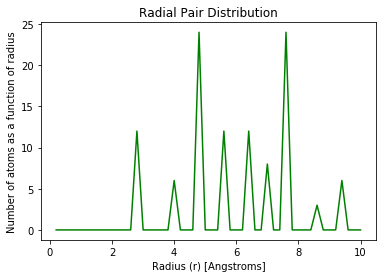

In [30]:
'''graph the function'''
#x=r
#f(x)=R @that point
plt.plot(r, R, color='green')
#plt.xlim(0,15)
plt.xlabel('Radius (r) [Angstroms]')
plt.ylabel('Number of atoms as a function of radius')
plt.title('Radial Pair Distribution')

Text(0,0.5,'PDF Value')

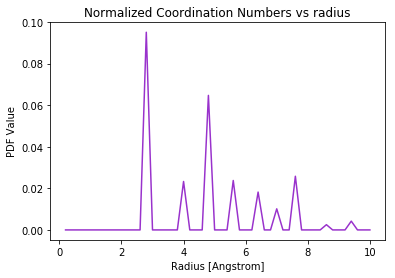

In [31]:
plt.plot(r, R_norm, color=('darkorchid'))
plt.title("Normalized Coordination Numbers vs radius")
plt.xlabel("Radius [Angstrom]")
plt.ylabel("PDF Value")

In [16]:
a=r**2
np.divide(R[:20],a[:20])

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 153.06122449,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  37.5       ])